<a href="https://colab.research.google.com/github/dovalless/inmersion-de-datos-con-python/blob/main/credito_banco_aleman_inmersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INMERSION DE DATOS CON PYTHON

#**PROBLEMA DE NEGOCIO**


---



La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

# 1- configura el ambiente

In [3]:
# prompt: importa los siguientes modulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

# Importa los módulos necesarios
import pandas as pd  # Para manipulación de datos
import matplotlib.pyplot as plt  # Para visualización
import seaborn as sns  # Para visualización estadística
from google.colab import drive  # Para acceder a Google Drive
import warnings  # Para manejar advertencias

warnings.filterwarnings('ignore')  # Ignora las advertencias

drive.mount('/content/drive')  # Mounting Google Drive


Mounted at /content/drive


#**2. Preprocesamiento de Datos**


---


In [5]:
pd.set_option('display.max_columns', None)  # Muestra todas las columnas del DataFrame
global df_banco, resultado

In [7]:
df_banco = pd.read_csv('/content/drive/MyDrive/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [8]:
df_banco.shape

(1000, 21)

In [9]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [10]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [11]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [12]:
columnas = list(df_banco.select_dtypes(include='object').columns)
for columna in columnas:
  print(f'El nombre de la columna: {columna}' )
  print( list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [13]:
#dic = {'yes': 1, 'no': 0}
#df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
#df_banco['foreign_worker']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: foreign_worker, Length: 1000, dtype: int64

In [26]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes,' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [17]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
930,0,1,24,3,4,1747,5,4,4,3,2,1,2,24,3,2,1,2,1,0,0
451,0,4,6,3,5,518,5,3,3,2,1,1,1,29,3,2,1,3,1,0,1
492,0,4,6,5,5,1237,4,3,1,2,1,1,2,27,3,2,2,3,1,0,1


#**3. Exploración de Datos**


---


In [18]:
variable_dicretas = ['personal_status_sex', 'age','duration_in_month',
                     'credit_amount','default']
df_banco[variable_dicretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [19]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])


In [20]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [21]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


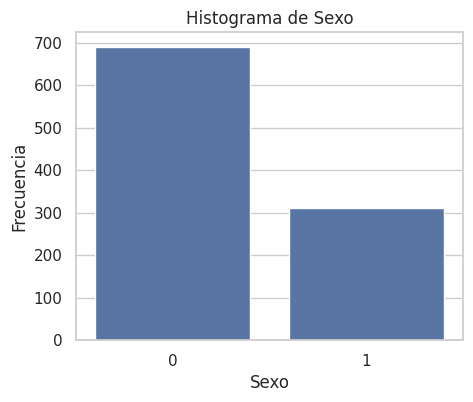

In [22]:
# Configurar el estilo de Seaborn (opcional
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
# Mostrar el histograma
plt.show()

In [23]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

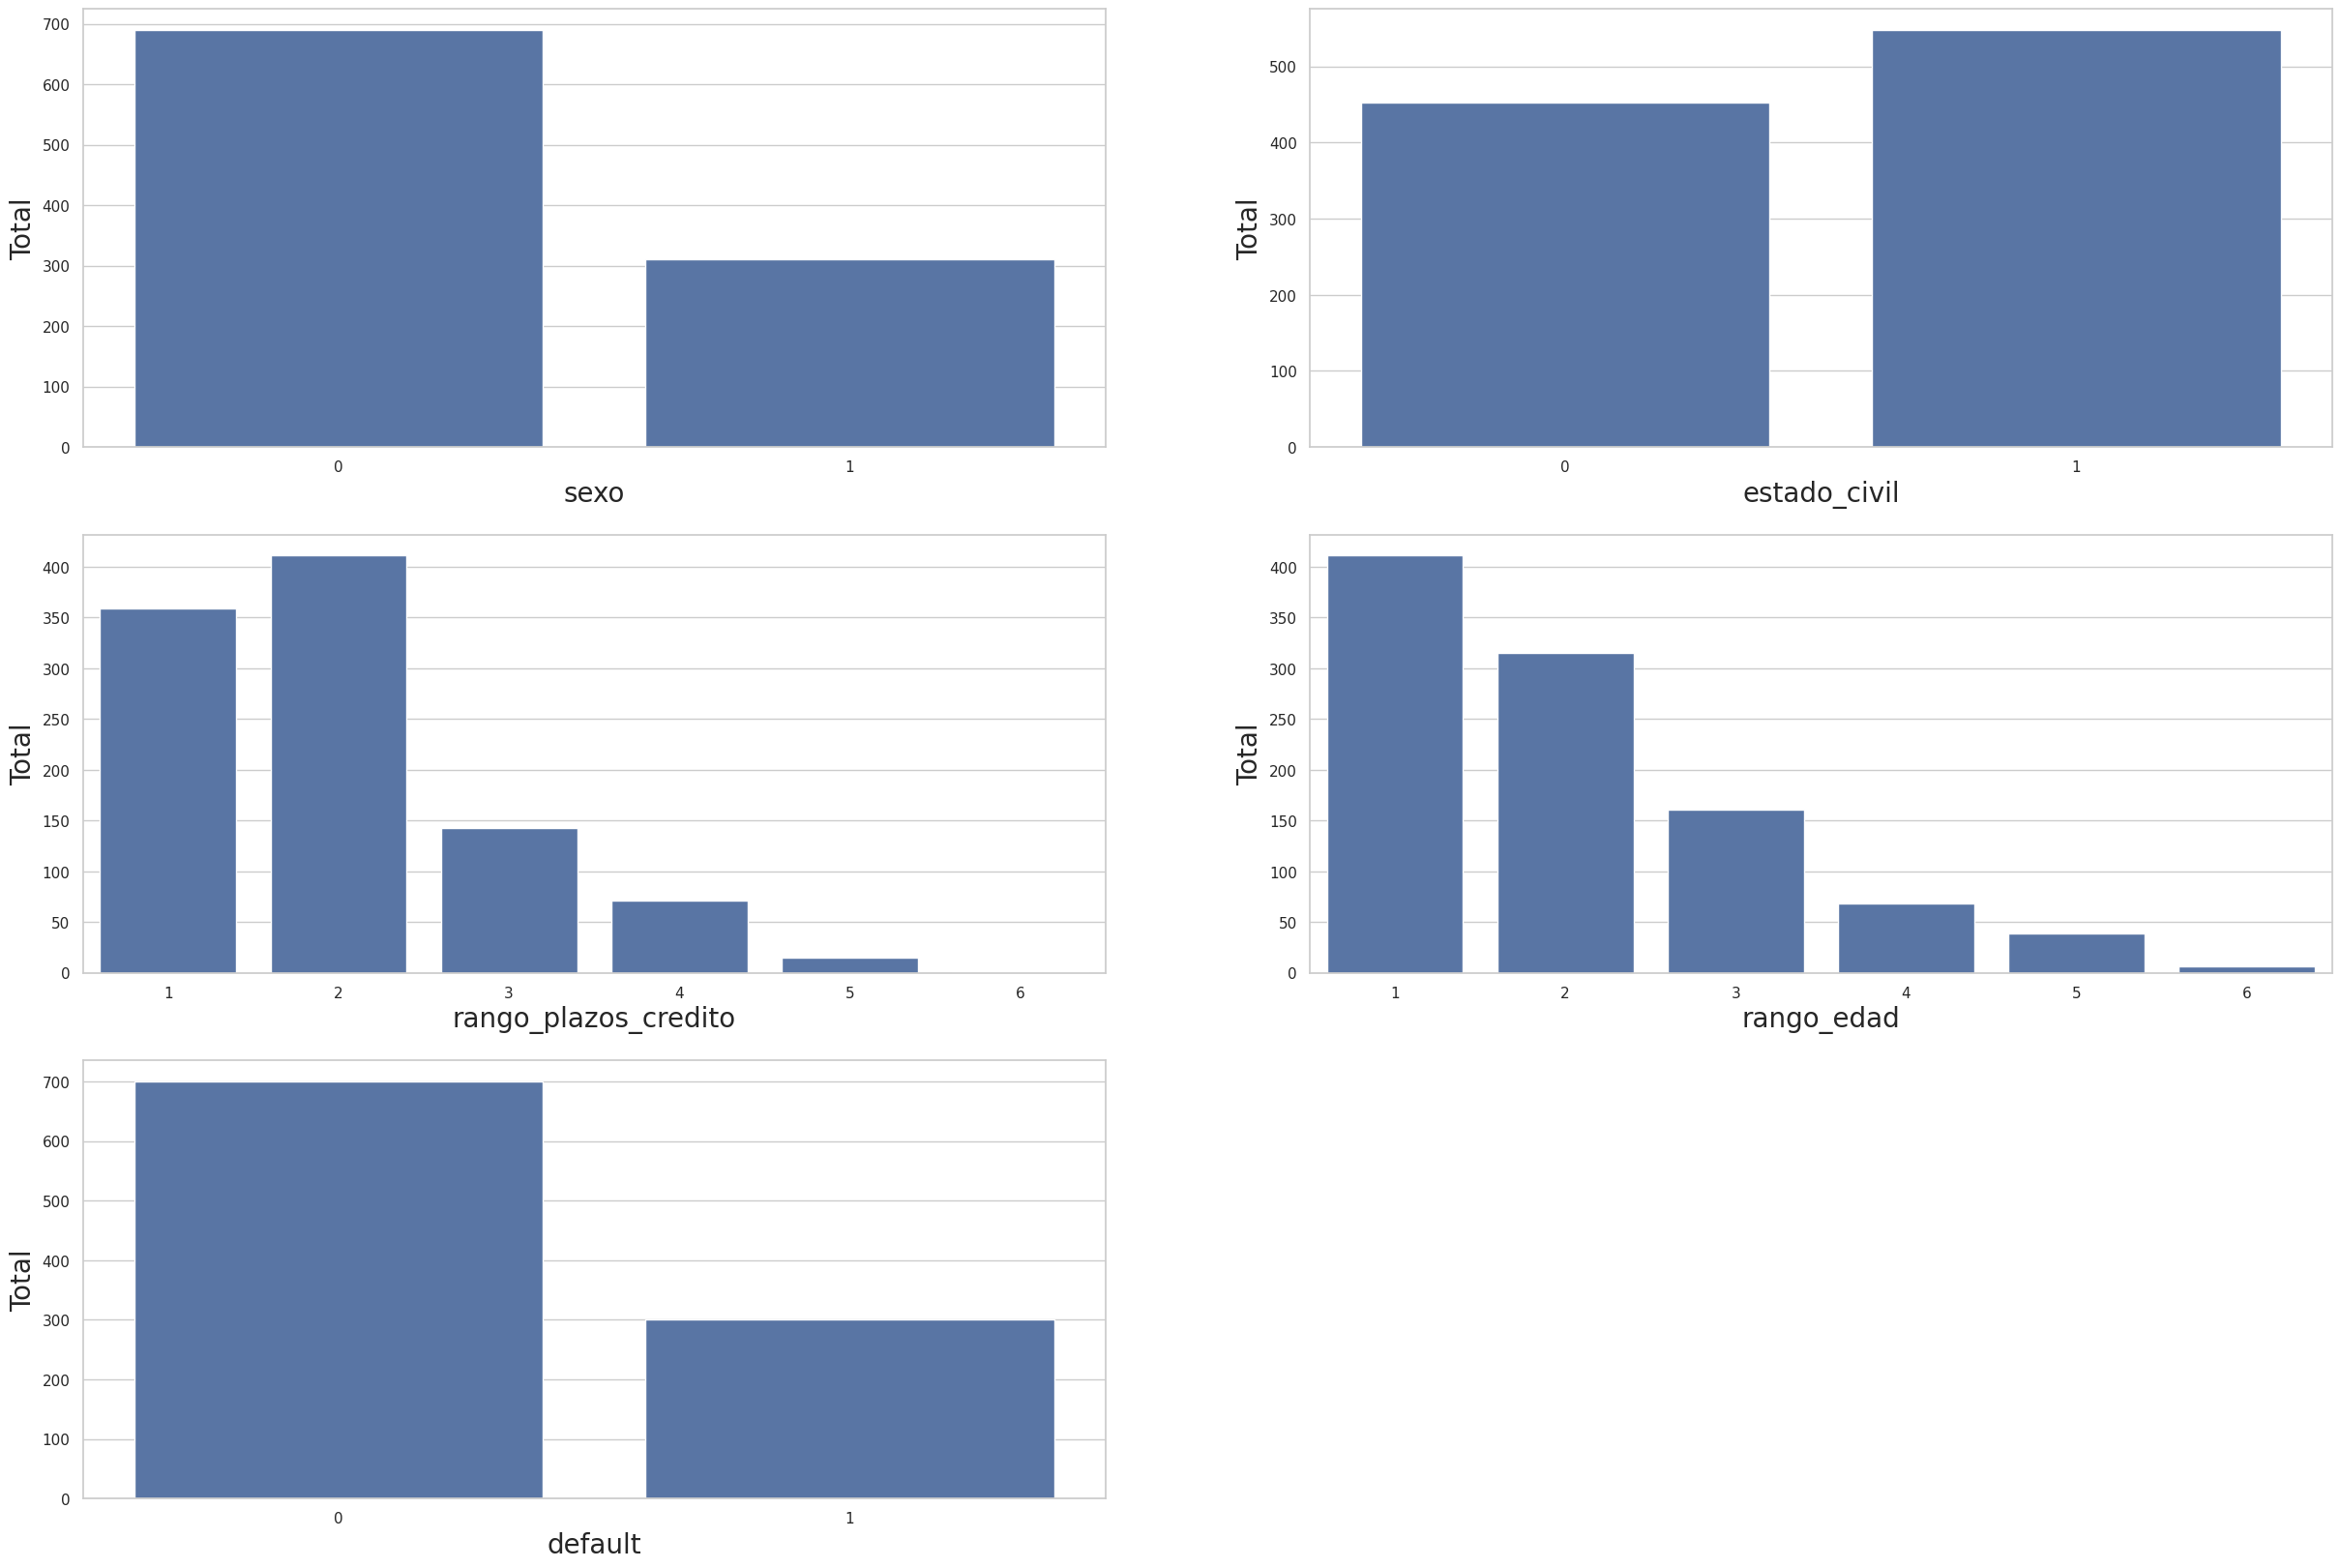

In [24]:
analisis_exploratorio()

DESAFIOS


1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.

2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.

3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad
esencial.

#**Desafíos día 1**


---


1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.
2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.
3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

### **Desafío 1:**



**1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.**

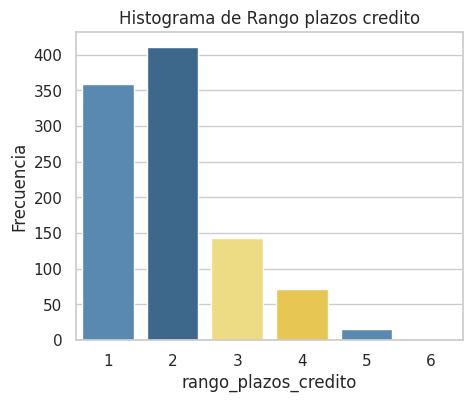

In [57]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn con colores personalizados
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='rango_plazos_credito', palette=['#4B8BBE', '#306998', '#FFE873', '#FFD43B'])
plt.title('Histograma de Rango plazos credito')
plt.xlabel('rango_plazos_credito')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

**Respuesta:**

De acuerdo a los datos del histograma rango_plazos_credito, se recomienda:
1. Excluir los datos del plazo de 72 meses debido a la ausencia total de créditos.
2. Tratar con precaución los datos de 60 y 38 meses, debido a su baja frecuencia. Estos datos pueden ser considerados outliers y deben ser analizados para ver si tienen un impacto desproporcionado en el modelo.
3. Incluir los datos de 12, 24, y 36 meses, ya que representan la mayoría de la demanda y proporcionan una base sólida para el análisis.

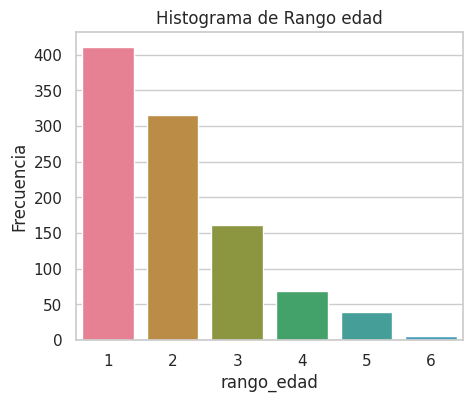

In [58]:


# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn con colores intensos
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='rango_edad', palette=sns.color_palette("husl", 8))
plt.title('Histograma de Rango edad')
plt.xlabel('rango_edad')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

**Respuesta:**

De acuerdo a los datos del histograma rango_edad, se recomienda:
1. Excluir el Rango de Edad 70-80 (6): dado que este grupo tiene muy pocos registros, es recomendable excluirlo del análisis para evitar distorsionar el modelo.
2. Considerar con Precaución el Rango de Edad 60-70 (5): aunque este rango tiene más datos que el de 70-80, sigue teniendo una cantidad significativamente menor. Puede ser útil incluirlo en el análisis pero monitorear su impacto y considerar ajustes según sea necesario.
3. Incluir Rangos de Edad 18-60 (1, 2, 3, 4): estos rangos tienen una cantidad suficiente de datos para ser representativos y deben incluirse en el modelo.

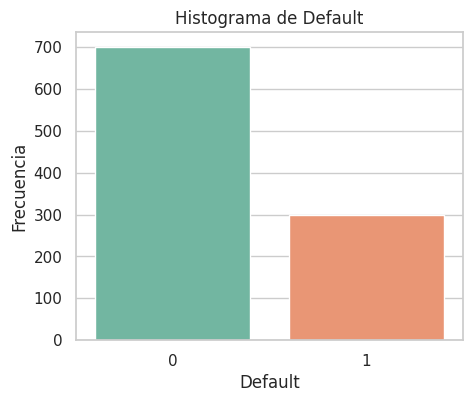

In [60]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn con colores llamativos
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='default', palette=sns.color_palette("Set2"))
plt.title('Histograma de Default')
plt.xlabel('Default')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

**Respuesta:**

De acuerdo a los datos del histograma default, se recomienda:

Incluir Todos los Registros: no se deben excluir los registros de malos clientes ya que son esenciales para un modelo equilibrado que pueda identificar tanto comportamientos positivos como riesgos.

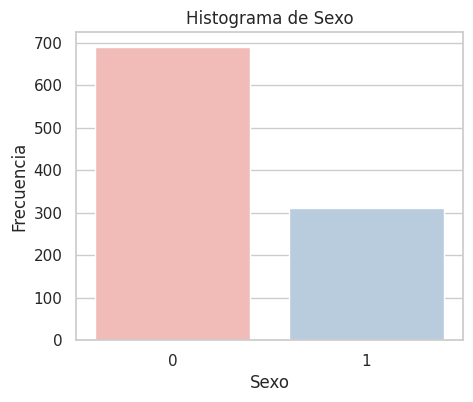

In [61]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn con colores más luminosos
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='sexo', palette=sns.color_palette("Pastel1"))
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

**Respuesta:**

De acuerdo a los datos del histograma sexo, se recomienda:
Incluir todos los registros de hombres y mujeres, ya que ambos grupos tienen una representación significativa.

### **Desafío 2:**




**2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.**

**Respuestas:**

**a) Qué es un mapa de calor**

  Un mapa de calor es una representación visual en dos dimensiones de datos organizados en una cuadrícula. Cada punto en la cuadrícula se indica mediante un color, con colores más oscuros que denotan valores más altos que los colores claros. Este tipo de mapa facilita la detección de patrones, tendencias y variaciones dentro de los datos, permitiendo a los usuarios identificar de manera rápida áreas con valores elevados o bajos, así como agrupaciones y anomalías.

**b) Como crear un mapa de calor para analizar la correlación de las variables**
- Importar las bibliotecas: pandas seaborn matplotlib.
- Cargar los datos: se utiliza pandas para cargar tus datos en un DataFrame.
- Calcular la matriz de correlación: se usa el método corr() de pandas para calcular la correlación entre las variables.

    correlation_matrix = df.corr()

- Crear el mapa de calor: se usa seaborn para crear el mapa de calor de la matriz de correlación.
- Interpretar el mapa de calor

In [62]:
# Calcular la matriz de correlación
correlation_matrix = df_banco.corr()

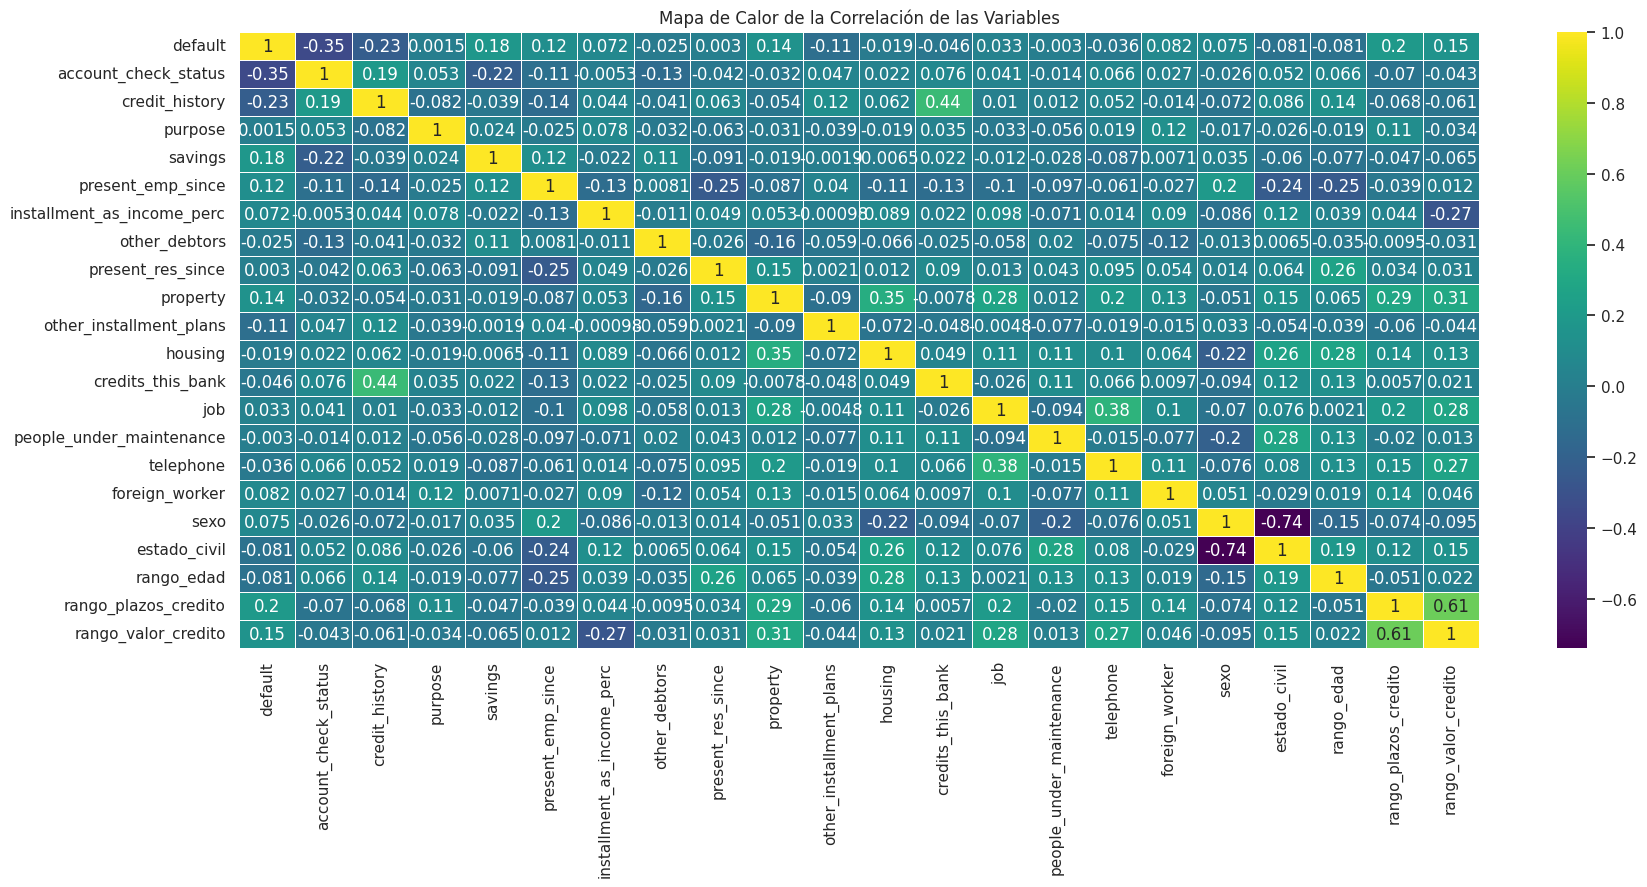

In [75]:
# Crear el mapa de calor con colores diferentes
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación de las Variables')
plt.show()




### **Desafío 3:**



**3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.**

**Respuesta:**

Cada factor analizado aporta información crucial para la estrategia del banco. Es esencial incluir todos los datos relevantes y excluir aquellos con representación extremadamente baja, asegurando la limpieza y validación de los datos para evitar sesgos y mejorar la precisión del modelo. Estos hallazgos deben guiar las decisiones estratégicas del banco en términos de desarrollo de productos, políticas de crédito y estrategias de mitigación de riesgos.

### **Respuesta prof**

**Desafío 2**

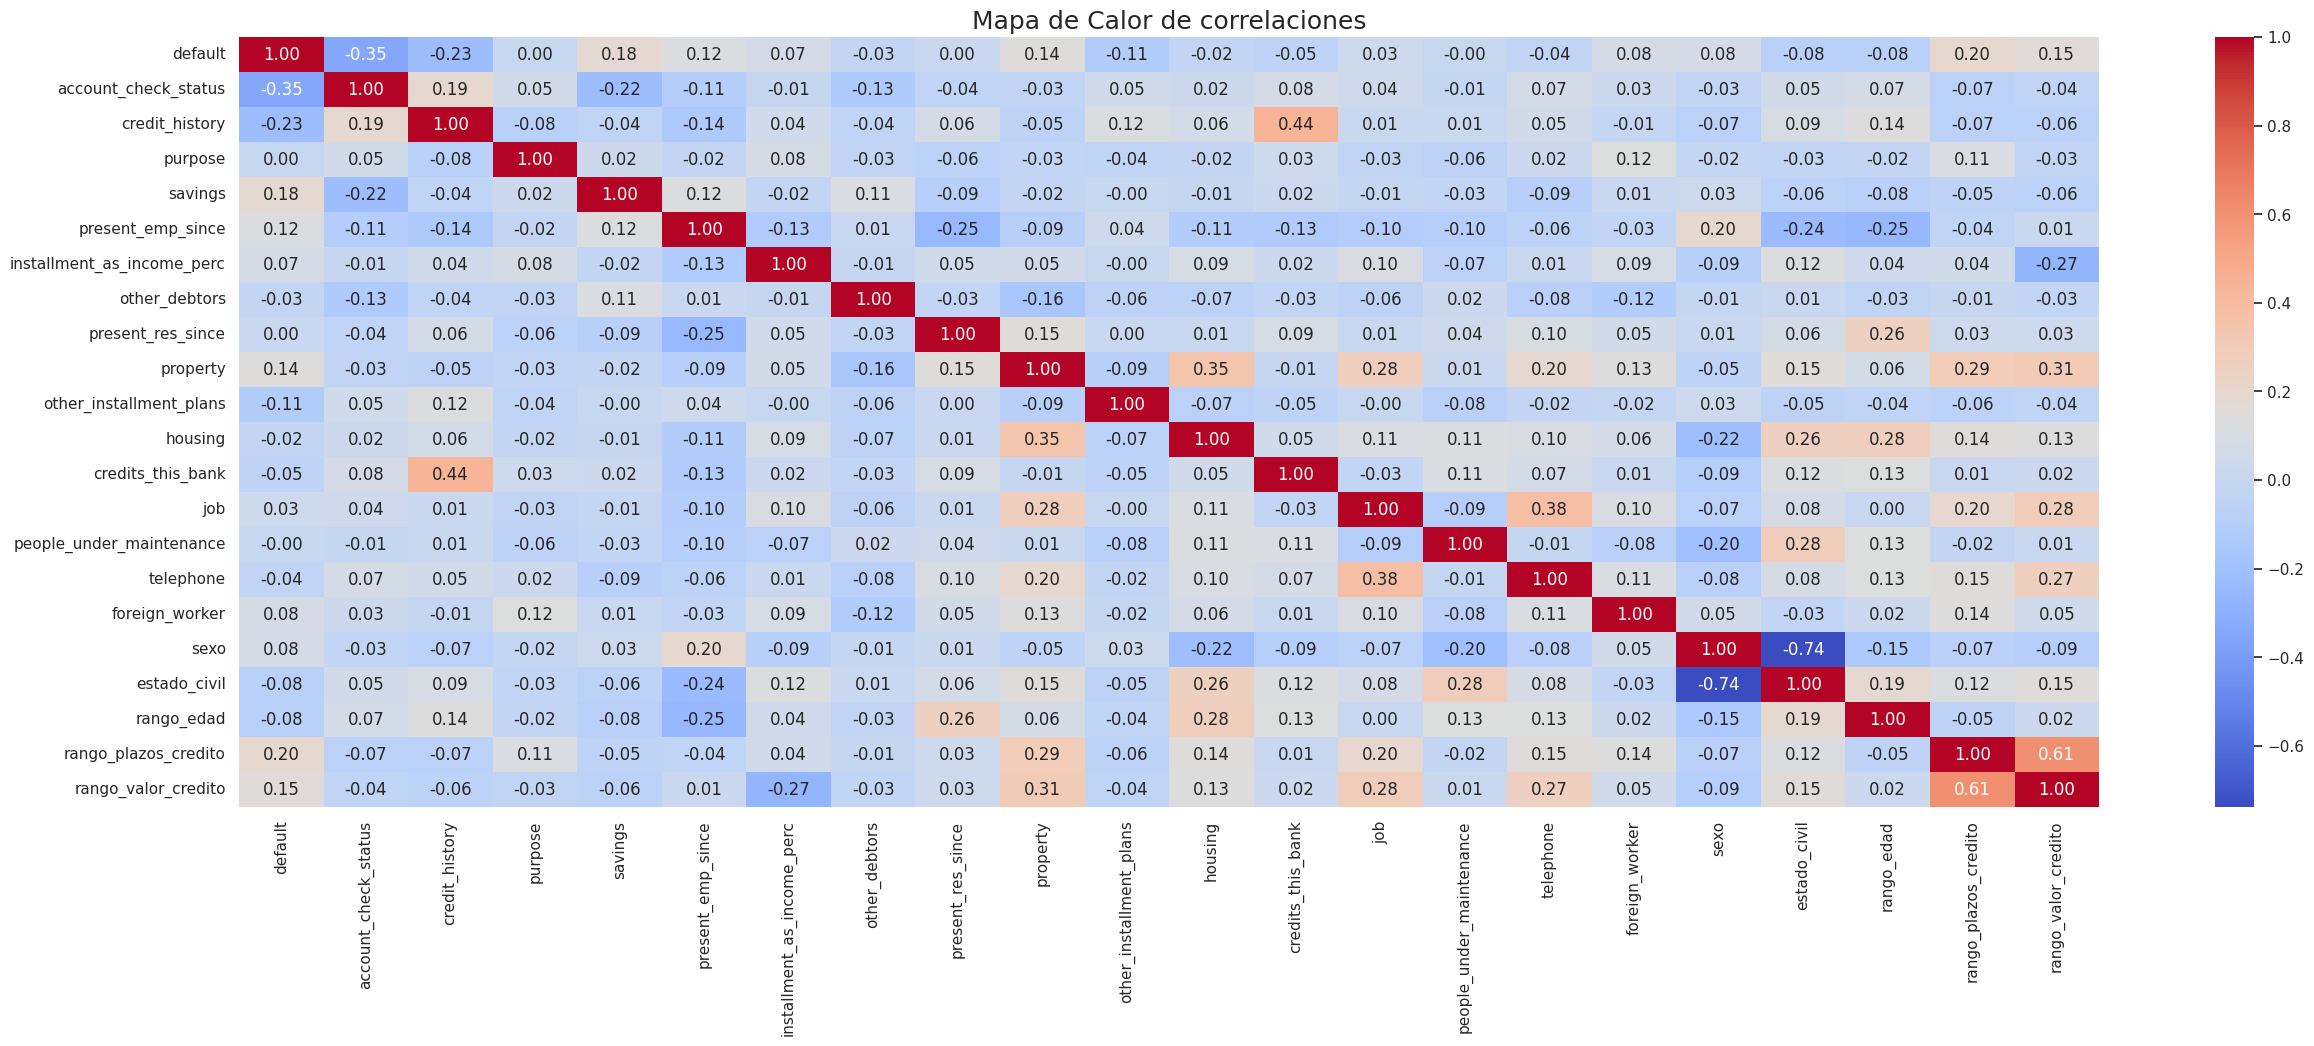

In [25]:
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de correlaciones', fontsize=18 )
plt.show()

#**4. Construcción de Modelos**


---


In [27]:
# prompt: importar las siguientes bibliotecas: train_test_split, Logistic Regression, Decision Tree Classifier, RandomForest Classifier, Gaussian NB, accuracy_score, precision_score,
# recall score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Preprocesar los datos
# ... (your preprocessing code here)

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X = df_banco.drop('default', axis=1)
y = df_banco['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 4. Evaluar el modelo
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')

# 5. Mejorar el modelo (opcional)
# ... (your model improvement code here)

In [35]:
#@title
def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [36]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.7166666666666667
0.5068493150684932
0.43023255813953487
0.46540880503144655
0.6310041295370571


Random Forest
0.77
0.673469387755102
0.38372093023255816
0.4888888888888889
0.7795316235600955


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




In [37]:
resultados

{'Model': ['Regresión Logística',
  'Árbol de Decisión',
  'Random Forest',
  'Naive Bayes'],
 'Accuracy': [0.78, 0.7166666666666667, 0.77, 0.74],
 'Precision': [0.6785714285714286,
  0.5068493150684932,
  0.673469387755102,
  0.5465116279069767],
 'Recall': [0.4418604651162791,
  0.43023255813953487,
  0.38372093023255816,
  0.5465116279069767],
 'F1-score': [0.5352112676056338,
  0.46540880503144655,
  0.4888888888888889,
  0.5465116279069767],
 'AUC-ROC': [0.799934796783308,
  0.6310041295370571,
  0.7795316235600955,
  0.7800478156922409]}

#**5. Evaluación y Selección del Modelo**


---


In [76]:
#@title
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # Texto que quieres centrar
  texto = "¿Cuál de estos modelos seleccionarías y por qué?"

  # Crear una celda HTML con el texto centrado
  display(HTML(f"<center><h2>{texto}</h2></center>"))

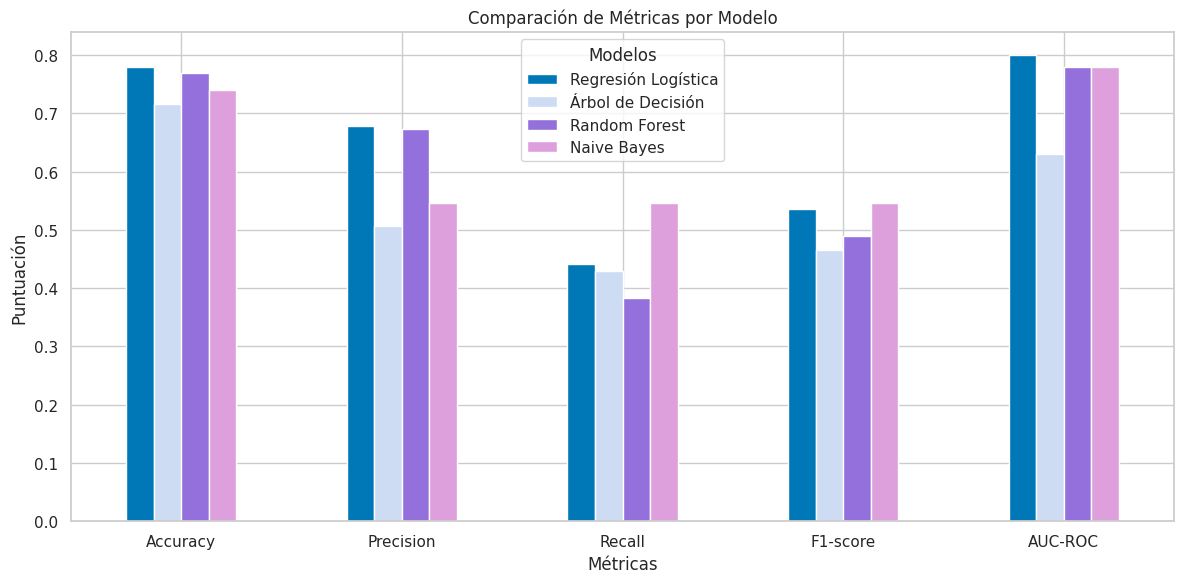

In [40]:
visualiza_resultados()

**¿Cuál de estos modelos seleccionarías y por qué?**

Seleccionaría Random Forest, porque parece ser el más equilibrado y efectivo. Aunque su recall es menor que el de Naive Bayes, ofrece una combinación superior de precisión y AUC-ROC, lo que indica que tiene un buen rendimiento general y es efectivo para diferenciar entre buenos y malos clientes. Por lo tanto, seleccionaríamos Random Forest debido a su mejor desempeño en la mayoría de las métricas clave.

#**Desafíos día 2**


---


1. Evaluar la Matrix de Confusión
2. Balancear la variable target
3. Seleccionar sólo algunas variable y reevaluar

### **Desafío 1:**



**1. Evaluar la Matrix de Confusión**

**1. Evaluar la Matrix de Confusión**

**a) ¿Qué es una matriz de confusión?**

**Respuesta:**

Una matriz de confusión, o matriz de error, es una herramienta que se utiliza para medir la efectividad de un modelo de clasificación. En esta tabla, se registran tanto las predicciones correctas como las incorrectas, desglosadas por cada categoría, permitiendo así una evaluación detallada del rendimiento del modelo.

**b) ¿Cómo se lee una matriz de confusión?**

Una matriz de confusión es una herramienta visual que ayuda a entender el desempeño de un modelo de clasificación y se estructura de la siguiente manera:

**Filas:** representan las clases reales (verdaderos valores).

**Columnas:** representan las clases predichas por el modelo.

**Para leerla:**

**Diagonal principal:** indica las predicciones correctas. Cuanto mayor sea el valor, mejor es el modelo para esa clase.

**Fuera de la diagonal:** indica las predicciones incorrectas. Un valor alto en una posición fuera de la diagonal significa que el modelo está confundiendo las clases.

**c) ¿Qué tipos de errores se puede identificar a traves de una matriz de confusión?**

 Se pueden identificar los siguientes tipos de errores:

**1. Falsos Positivos (FP):** Instancias donde el modelo predijo incorrectamente la clase positiva cuando en realidad es negativa.

**2. Falsos Negativos (FN):** Instancias donde el modelo predijo incorrectamente la clase negativa cuando en realidad es positiva.

**3. Verdaderos Negativos (TN):** Instancias correctamente identificadas como negativas.

**4. Verdaderos Positivos (TP):** Instancias correctamente identificadas como positivas.

**d) ¿De qué manera, según el problema de negocio que se está tratando, cuál métrica se debe priorizar?**

Para abordar el problema de reducir el riesgo crediticio, la métrica prioritaria debe enfocarse en la precisión del modelo en la predicción de incumplimiento crediticio, utilizando métricas que evalúen tanto la precisión como la sensibilidad.

1) **Matriz de confusión**
  ¿qué es? ¿cómo se lee? ¿qué tipos de errores identifica? ¿ de qué manera (según el problema de negocios), cuál métrica debe priorizarse?

  Utilicé Claude.ia para aprender; comparto la respuesta porque parece precisa.

  Una matriz de confusión es una herramienta utilizada en aprendizaje automático y estadística para evaluar el rendimiento de un modelo de clasificación. Es una tabla que muestra la relación entre las predicciones del modelo y los valores reales.

Estructura básica (para un problema binario):
```
              Predicción
              Positivo | Negativo
Real Positivo    VP    |    FN
     Negativo    FP    |    VN
```

Donde:
VP = Verdaderos Positivos
FN = Falsos Negativos
FP = Falsos Positivos
VN = Verdaderos Negativos

Lectura:
Se lee comparando las predicciones (columnas) con los valores reales (filas).

Tipos de errores:
1. Error Tipo I (Falso Positivo): El modelo predice positivo cuando es realmente negativo.
2. Error Tipo II (Falso Negativo): El modelo predice negativo cuando es realmente positivo.

La priorización de métricas depende del problema de negocio:

1. Precisión (VP / (VP + FP)): Útil cuando el costo de los falsos positivos es alto.
   Ejemplo: Detección de spam (evitar marcar correos legítimos como spam).

2. Exhaustividad o Recall (VP / (VP + FN)): Importante cuando el costo de los falsos negativos es alto.
   Ejemplo: Detección de enfermedades (no queremos perder casos positivos).

3. F1-Score (media armónica de precisión y exhaustividad): Útil cuando se busca un equilibrio.

4. Exactitud ((VP + VN) / Total): Adecuada cuando las clases están balanceadas y los errores tienen costos similares.

5. Especificidad (VN / (VN + FP)): Importante en algunos contextos médicos o de seguridad.

La elección de la métrica a priorizar depende crucialmente del contexto específico del problema y de las consecuencias relativas de los diferentes tipos de errores en ese contexto.

### **Desafío 2:**



**2. Balancear la variable target**

**Aplicar Oversampling**

Dado que hay un desbalance significativo entre las clases de clientes buenos (0) y clientes malos (1), el oversampling puede ayudar a generar más registros de la clase minoritaria (1) para igualar la distribución de las clases. La técnica SMOTE (Synthetic Minority Over-sampling Technique) es útil en este caso.

Importar:

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [46]:
from imblearn.over_sampling import SMOTE

In [49]:
#@title
def crea_modelos_balanced():
    global df_banco, resultados

    y = df_banco['default']
    X = df_banco.drop(columns='default')

    # Aplicar SMOTE para balancear las clases
    smote = SMOTE(random_state=77)
    X_res, y_res = smote.fit_resample(X, y)

    train_x, test_x, train_y, test_y = train_test_split(X_res, y_res, test_size=0.30, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

# Ejecutar la función para crear modelos balanceados
crea_modelos_balanced()

# Mostrar los resultados
for i, model in enumerate(resultados['Model']):
    print(model)
    print('Accuracy:', resultados['Accuracy'][i])
    print('Precision:', resultados['Precision'][i])
    print('Recall:', resultados['Recall'][i])
    print('F1-score:', resultados['F1-score'][i])
    print('AUC-ROC:', resultados['AUC-ROC'][i])
    print('\n')

# Visualizar resultados
def visualiza_resultados():
    global df_banco, resultados
    results_df = pd.DataFrame(resultados)
    results_df.set_index('Model', inplace=True)

    # Transponer el DataFrame para facilitar la representación
    results_df = results_df.T
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Ajustar el tamaño de la figura y añadir espacio para la leyenda
    fig, ax = plt.subplots(figsize=(12, 8))
    results_df.plot(kind='bar', ax=ax, colormap='viridis', rot=0, color=colors)

    # Configurar el título y las etiquetas
    plt.title('Comparación de Métricas por Modelo (Balanceado)')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(pad=2)  # Añadir padding para ajustar la leyenda

    plt.show()

    from IPython.display import HTML, display

    # Texto que quieres centrar
    texto = "¿Cuál de estos modelos balanceados seleccionarías y por qué?"

    # Crear una celda HTML con el texto centrado
    display(HTML(f"<center><h2>{texto}</h2></center>"))

Regresión Logística
Accuracy: 0.7714285714285715
Precision: 0.7405660377358491
Recall: 0.7929292929292929
F1-score: 0.7658536585365854
AUC-ROC: 0.8333105833105833


Árbol de Decisión
Accuracy: 0.7428571428571429
Precision: 0.7163461538461539
Recall: 0.7525252525252525
F1-score: 0.7339901477832511
AUC-ROC: 0.7433797433797434


Random Forest
Accuracy: 0.8357142857142857
Precision: 0.8086124401913876
Recall: 0.8535353535353535
F1-score: 0.8304668304668305
AUC-ROC: 0.9044271544271544


Naive Bayes
Accuracy: 0.7071428571428572
Precision: 0.6609442060085837
Recall: 0.7777777777777778
F1-score: 0.7146171693735499
AUC-ROC: 0.7777095277095276




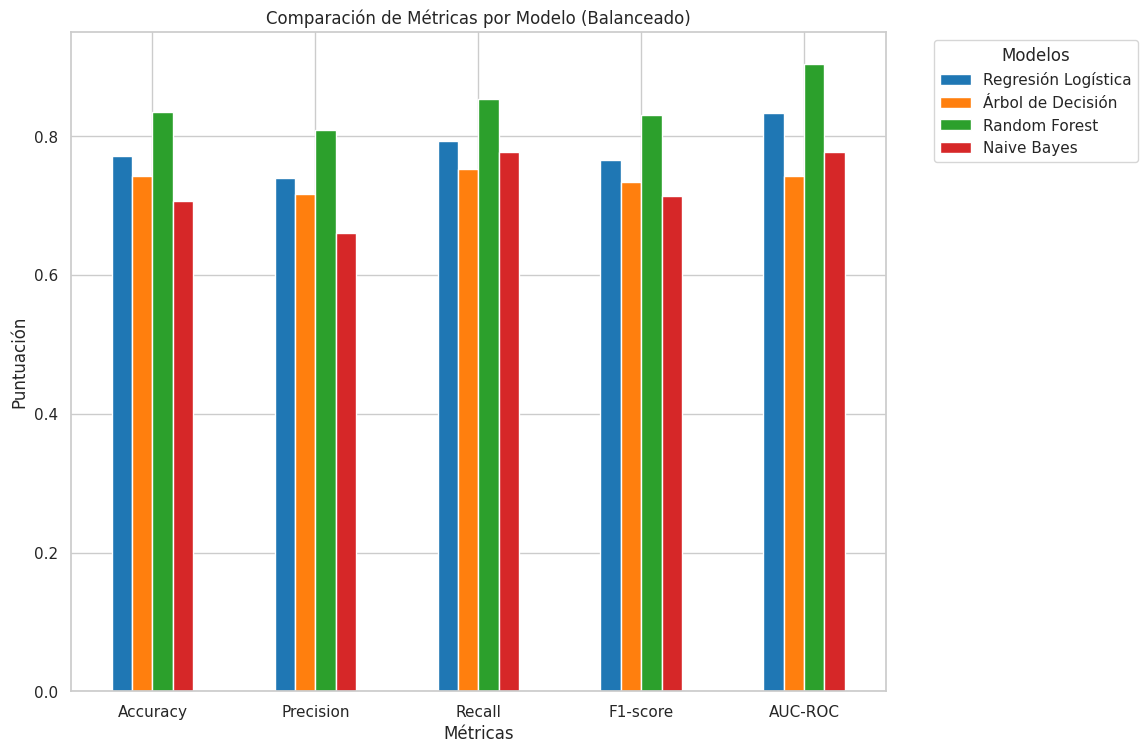

In [50]:
# Visualizar resultados balanceados
visualiza_resultados()


**¿Cuál de estos modelos balanceados seleccionarías y por qué?**

Entre los modelos evaluados después de balancear las clases, Random Forest sigue siendo el modelo más adecuado. Con la mayor precisión, recall, F1-score y AUC-ROC, Random Forest demuestra ser el modelo más robusto y confiable para evaluar la probabilidad de incumplimiento crediticio de los clientes, ofreciendo un equilibrio excelente entre identificar correctamente tanto los buenos como los malos clientes. Por lo tanto, se seleccionaría a Random Forest debido a su rendimiento superior en todas las métricas clave.

### **Desafío 3:**



3. Seleccionar sólo algunas variable y reevaluar

In [53]:
# Función para crear modelos balanceados con las mejores variables
def crea_modelos_balanced_mejores_variables():
    global df_banco, resultados

    y = df_banco['default']
    # Seleccionar variables con mayores correlaciones (ejemplo: sexo, estado_civil, rango_plazos_credito)
    X = df_banco[['sexo', 'estado_civil', 'rango_plazos_credito']]

    # Aplicar SMOTE para balancear las clases
    smote = SMOTE(random_state=77)
    X_res, y_res = smote.fit_resample(X, y)

    train_x, test_x, train_y, test_y = train_test_split(X_res, y_res, test_size=0.30, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

# Ejecutar la función para crear modelos balanceados con las mejores variables
crea_modelos_balanced_mejores_variables()

# Mostrar los resultados
for i, model in enumerate(resultados['Model']):
    print(model)
    print('Accuracy:', resultados['Accuracy'][i])
    print('Precision:', resultados['Precision'][i])
    print('Recall:', resultados['Recall'][i])
    print('F1-score:', resultados['F1-score'][i])
    print('AUC-ROC:', resultados['AUC-ROC'][i])
    print('\n')

# Visualizar resultados
def visualiza_resultados():
    global df_banco, resultados
    results_df = pd.DataFrame(resultados)
    results_df.set_index('Model', inplace=True)

    # Transponer el DataFrame para facilitar la representación
    results_df = results_df.T
    colors = ['#4B8BBE', '#306998', '#FFE873', '#FFD43B']

    # Ajustar el tamaño de la figura y añadir espacio para la leyenda
    fig, ax = plt.subplots(figsize=(12, 8))
    results_df.plot(kind='bar', ax=ax, colormap='viridis', rot=0, color=colors)

    # Configurar el título y las etiquetas
    plt.title('Comparación de Métricas por Modelo (Balanceado)')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(pad=2)  # Añadir padding para ajustar la leyenda

    plt.show()

    from IPython.display import HTML, display

    # Texto que quieres centrar
    texto = "¿Cuál de estos modelos balanceados seleccionarías y por qué?"

    # Crear una celda HTML con el texto centrado
    display(HTML(f"<center><h2>{texto}</h2></center>"))

Regresión Logística
Accuracy: 0.6214285714285714
Precision: 0.6
Recall: 0.5909090909090909
F1-score: 0.5954198473282443
AUC-ROC: 0.6437687687687688


Árbol de Decisión
Accuracy: 0.6214285714285714
Precision: 0.6
Recall: 0.5909090909090909
F1-score: 0.5954198473282443
AUC-ROC: 0.6432000182000182


Random Forest
Accuracy: 0.6214285714285714
Precision: 0.6
Recall: 0.5909090909090909
F1-score: 0.5954198473282443
AUC-ROC: 0.6458390208390208


Naive Bayes
Accuracy: 0.6190476190476191
Precision: 0.6144578313253012
Recall: 0.5151515151515151
F1-score: 0.5604395604395604
AUC-ROC: 0.6396737646737647




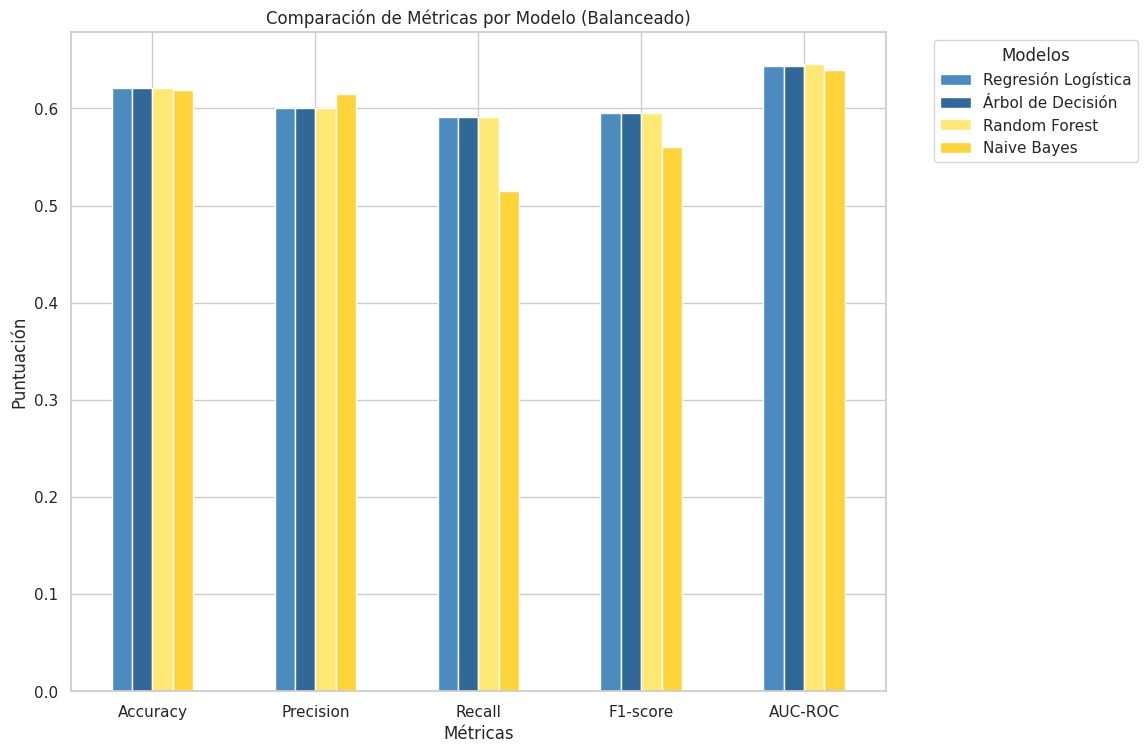

In [54]:
# Visualizar los resultados
visualiza_resultados()

**¿Cuál de estos modelos balanceados seleccionarías y por qué?**

A pesar de que los valores de precisión, recall y F1-score son idénticos para Regresión Logística, Árbol de Decisión y Random Forest, el modelo Random Forest se destaca ligeramente debido a su valor AUC-ROC más alto, lo que sugiere que tiene una mejor capacidad para distinguir entre las clases "bueno" y "malo" en el contexto de evaluación del riesgo crediticio.